# HSE 2022: Mathematical Methods for Data Analysis

## Homework 1

### Attention!
* For tasks where <ins>text answer</ins> is required **Russian language** is **allowed**.
* If a task asks you to describe something (make coclusions) then **text answer** is **mandatory** and **is** part of the task
* **Do not** upload the dataset (titanic.csv) to the grading system (we already have it)
* We **only** accept **ipynb** notebooks. If you use Google Colab then you'll have to download the notebook before passing the homework
* **Do not** use python loops instead of NumPy vector operations over NumPy vectors - it significantly decreases performance (see why https://blog.paperspace.com/numpy-optimization-vectorization-and-broadcasting/), will be punished with -0.25 for **every** task. 
Loops are only allowed in part 1 (Tasks 1 - 4). 
* Some tasks contain tests. They only test you solution on a simple example, thus, passing the test does **not** guarantee you the full grade for the task. 

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Python (2 points) 

**Task 1** (0.5 points)<br/> 
Enter nonzero numbers `a`,  `r` and `N`. Find the first `N` members of geometric progression with the first member `a` and factor `r`, without using formula for the product.

In [2]:
def find_product(a,r,N):
    if N <= 0:
        return []
    arr_product = [a]
    for i in range(N - 1):
        arr_product.append(arr_product[-1] * r)
    return arr_product

a = 2
r = 3
N = 3
print(find_product(a,r,N))

[2, 6, 18]


**Task 2** (0.5 points) <br/> 
Enter an integer number `N`. Check if it is a palindrome number. It means that it can be read equally from left to right and from right to back. 

In [3]:
def check_palindrome(N) -> bool:
    str_n = str(N)
    check_palindrome : bool = True
    for i in range(len(str_n) // 2):
        check_palindrome &= (str_n[i] == str_n[-i - 1])
    return check_palindrome

for N in [3, 81, 111, 113, 810, 2022, 4774, 51315, 611816]:
    print(N, check_palindrome(N))

3 True
81 False
111 True
113 False
810 False
2022 False
4774 True
51315 True
611816 False


**Task 3** (0.5 points) <br/> 
Find the first `N` palindrome numbers starting from 1000 (you may use the function from the precious task).

In [4]:
def find_palindromes(N):
    palindromes = []
    last = 1000
    while(len(palindromes) < N):
        if (check_palindrome(last)):
            palindromes.append(last)
        last += 1
    return palindromes

print(find_palindromes(5))
print(find_palindromes(10))
print(find_palindromes(20))

[1001, 1111, 1221, 1331, 1441]
[1001, 1111, 1221, 1331, 1441, 1551, 1661, 1771, 1881, 1991]
[1001, 1111, 1221, 1331, 1441, 1551, 1661, 1771, 1881, 1991, 2002, 2112, 2222, 2332, 2442, 2552, 2662, 2772, 2882, 2992]


**Task 4** (0.5 points) <br/> 
There are numbers: `a`, `b`, `c`. Without using functions `min`, `max` and other functions, find the minimum number.

In [5]:
from random import randint
def find_min(a, b, c):
    min_ = a
    min_ = b if b < min_ else min_
    min_ = c if c < min_ else min_
    return min_

for i in range(10):
    
    a = randint(-100, 100)
    b = randint(-100, 100)
    c = randint(-100, 100)
    
    print(a, b, c, '\tMinimum:', find_min(a, b, c))

-99 -44 -15 	Minimum: -99
87 5 36 	Minimum: 5
51 -37 -37 	Minimum: -37
93 -33 -53 	Minimum: -53
-73 -33 -35 	Minimum: -73
-99 70 26 	Minimum: -99
70 -8 -51 	Minimum: -51
24 -42 -95 	Minimum: -95
-43 -34 46 	Minimum: -43
-16 30 22 	Minimum: -16


# 2. Numpy (4 points)

**Task 1** (0.5 points) <br/>
Create a random array (`np.random.rand()`) with length of 17 and with sum of its elements equals to 6.

In [6]:
my_array = np.random.rand(17)
my_array = my_array / np.sum(my_array) * 6
print(f'Length: {len(my_array)}')
print(f'Sum of elements: {np.sum(my_array)}')

Length: 17
Sum of elements: 5.999999999999999


**Task 2** (0.5 points) <br/>
Create two random arrays $a$ and $b$ with the same length. 

Calculate the following distances between the arrays **without using special funcrion. You may only use basic numpy operations (`np.linalg.*` and other high-level ones are prohibited).**:

* Manhattan Distance
$$ d(a, b) = \sum_i |a_i - b_i| $$
* Euclidean Distance
$$ d(a, b) = \sqrt{\sum_i (a_i - b_i)^2} $$
* Chebyshev Distance
$$ d(a, b) = \underset{i}{max} |a_i - b_i| $$
* Cosine Distance
$$ d(a, b) = 1 - \frac{a^\top b}{||a||_2\cdot||b||_2} $$


In [7]:
def calculate_manhattan(a, b):    
    distance = np.sum(np.absolute(a - b))
    return distance

def calculate_euclidean(a, b):    
    distance = np.sqrt(np.sum((a - b) * (a - b)))
    return distance

def calculate_chebyshev(a, b):    
    distance = np.amax(np.absolute(a - b))
    return distance

def calculate_cosine(a, b):    
    distance = 1 - (a.T.dot(b)) / (calculate_euclidean(0, a) * calculate_euclidean(0, b))
    return distance

In [8]:
n = 30
a = np.random.rand(n)
b = np.random.rand(n)
print(f'Manhattan distance: {calculate_manhattan(a, b)}')
print(f'Euclidean distance: {calculate_euclidean(a, b)}')
print(f'Chebyshev distance: {calculate_chebyshev(a, b)}')
print(f'Cosine distance: {calculate_cosine(a, b)}')

Manhattan distance: 10.179285386479265
Euclidean distance: 2.2336389848987874
Chebyshev distance: 0.9784121340988283
Cosine distance: 0.24629416920452207


**Task 3** (0.5 points) <br/>
Create a random array (`np.random.randint()`) with length of 76. Transform the array so that 
* Maximum element(s) value is -1
* Minimum element(s) value is -4
* Other values are in interval (-4; -1) with keeping the order

In [9]:
def transform(array):
    transformed_array = array - np.min(array)
    transformed_array /= np.max(transformed_array)
    transformed_array *= 3
    transformed_array -= 4
    return transformed_array

In [10]:
my_array = np.random.rand(76)
my_array = transform(my_array)
print(f'Min: {np.min(my_array)}')
print(f'Max: {np.max(my_array)}')
print('Array:')
print(my_array)

Min: -4.0
Max: -1.0
Array:
[-1.24415614 -1.79514605 -3.71366763 -3.41967795 -3.26894747 -1.98795442
 -3.63096248 -3.28756782 -1.88810474 -1.         -1.54069111 -3.19348208
 -3.33567043 -3.06639883 -1.86016429 -3.17140986 -3.82490275 -1.2557273
 -3.79619351 -1.54324202 -1.20572526 -2.01318082 -3.86723622 -3.83309145
 -2.90665827 -1.64045108 -1.31174325 -2.09397355 -3.92431227 -1.78265347
 -2.35602089 -3.30935333 -3.86540641 -2.77633576 -2.3664539  -3.03654993
 -2.42065475 -2.23079288 -1.65229309 -2.35784438 -1.0898693  -4.
 -2.85752472 -2.0495928  -3.01468518 -1.05761565 -1.21587925 -2.14663677
 -2.24833359 -3.88950601 -1.14275595 -3.05025082 -3.43623089 -3.55387168
 -2.59458267 -3.03956341 -3.88511769 -3.90572745 -2.32553066 -2.33976068
 -3.68304451 -2.73804404 -1.79662811 -1.63351085 -3.7026886  -2.63717499
 -3.04615795 -3.93170152 -2.93620918 -2.28793679 -1.72378554 -3.42378789
 -1.4035533  -1.77743838 -2.20434656 -1.4953694 ]


**Task 4** (0.5 points) <br/>
Create an array with shape of $8 \times 5$ with integers from [-7, 43]. Print a column that contains the maximum element of the array.

In [11]:
my_array = np.random.randint(-7, 43, size=(8, 5))
selected_column = my_array[:, np.argmax(np.max(my_array, axis=0))]
print('Shape: ', my_array.shape)
print('Array:')
print(my_array)
print(f'Selected column: {selected_column}')

Shape:  (8, 5)
Array:
[[15 19 -3 12 23]
 [16 -2 15  3 35]
 [25 29 16 15 29]
 [30 23  6 39 17]
 [42 -3 42  8 28]
 [15 35 -1 -3 19]
 [22 14 39 14 36]
 [13 41 31 11 27]]
Selected column: [15 16 25 30 42 15 22 13]


**Task 5** (0.5 points) <br/>

Replace all missing values in the following array with median.

In [12]:
arr = np.random.rand(10)
idx = np.random.randint(0, 10, 4)
arr[idx] = np.nan

print('Array:')
print(arr)

Array:
[0.45249646 0.45825796        nan 0.25571006 0.34064779 0.26617761
        nan        nan        nan 0.61346905]


In [13]:
def replace_missing(arr):
    median = np.median(arr[~np.isnan(arr)])
    array_without_missing = np.nan_to_num(arr, nan=median)
    return array_without_missing

In [14]:
arr = replace_missing(arr)
print('Array with no missing values:')
print(arr)

Array with no missing values:
[0.45249646 0.45825796 0.39657213 0.25571006 0.34064779 0.26617761
 0.39657213 0.39657213 0.39657213 0.61346905]


**Task 6** (0.5 points) <br/>
Create a function which takes an image ```X``` (3D array of the shape (n, m, 3)) as an input and returns the mean for all 3 channels (a vector of shape 3).

In [15]:
def mean_channel(X):
    mean_vector = np.mean(np.mean(X, axis=1), axis=0)
    return mean_vector

In [16]:
n = 19
m = 23
X =  np.random.randint(-11, 8, size=(n, m, 3))
print(f'Vector of means: {mean_channel(X)}')

Vector of means: [-2.26773455 -2.4805492  -1.91304348]


### **Task 7** (1 points) <br/>
Create a function which takes a 3D matrix ```X``` as an input and returns all its unique vertical (first axis) layers.

Sample input:

     ([[[1, 2, 3],
        [1, 2, 3],
        [1, 2, 3]],

       [[4, 5, 6],
        [4, 5, 7]
        [4, 5, 6]],

       [[7, 8, 9],
        [7, 8, 9]
        [7, 8, 9]]])
        
Sample output:

     ([[[1, 2, 3],
        [1, 2, 3]],

       [[4, 5, 6],
        [4, 5, 7]],

       [[7, 8, 9],
        [7, 8, 9]]])

In [17]:
def get_unique_columns(X):
    X_unique = np.unique(X, axis=1)
    return X_unique

In [18]:
X =  np.random.randint(4, 6, size=(n, 3, 3))
print('Matrix:')
print(X)
print('Unique columns:')
get_unique_columns(X)

Matrix:
[[[4 4 5]
  [4 5 4]
  [5 4 5]]

 [[5 5 5]
  [4 4 4]
  [5 4 5]]

 [[5 4 5]
  [4 5 4]
  [5 5 5]]

 [[5 5 5]
  [4 5 5]
  [4 5 4]]

 [[5 4 4]
  [4 4 4]
  [4 5 4]]

 [[4 5 5]
  [4 5 5]
  [4 4 5]]

 [[4 4 5]
  [5 5 4]
  [5 4 4]]

 [[5 4 5]
  [5 4 4]
  [5 4 4]]

 [[4 5 4]
  [5 4 4]
  [5 5 4]]

 [[4 5 5]
  [5 4 5]
  [5 5 4]]

 [[5 4 4]
  [4 5 5]
  [5 4 4]]

 [[5 4 4]
  [5 5 5]
  [5 5 4]]

 [[4 4 4]
  [5 4 4]
  [5 4 5]]

 [[4 4 4]
  [4 5 5]
  [5 5 5]]

 [[4 4 4]
  [4 5 5]
  [4 4 5]]

 [[5 5 4]
  [4 4 4]
  [5 5 5]]

 [[4 4 4]
  [5 5 5]
  [5 4 4]]

 [[4 5 4]
  [4 4 4]
  [5 4 4]]

 [[5 4 5]
  [4 4 5]
  [5 4 4]]]
Unique columns:


array([[[4, 4, 5],
        [4, 5, 4],
        [5, 4, 5]],

       [[5, 5, 5],
        [4, 4, 4],
        [5, 4, 5]],

       [[5, 4, 5],
        [4, 5, 4],
        [5, 5, 5]],

       [[5, 5, 5],
        [4, 5, 5],
        [4, 5, 4]],

       [[5, 4, 4],
        [4, 4, 4],
        [4, 5, 4]],

       [[4, 5, 5],
        [4, 5, 5],
        [4, 4, 5]],

       [[4, 4, 5],
        [5, 5, 4],
        [5, 4, 4]],

       [[5, 4, 5],
        [5, 4, 4],
        [5, 4, 4]],

       [[4, 5, 4],
        [5, 4, 4],
        [5, 5, 4]],

       [[4, 5, 5],
        [5, 4, 5],
        [5, 5, 4]],

       [[5, 4, 4],
        [4, 5, 5],
        [5, 4, 4]],

       [[5, 4, 4],
        [5, 5, 5],
        [5, 5, 4]],

       [[4, 4, 4],
        [5, 4, 4],
        [5, 4, 5]],

       [[4, 4, 4],
        [4, 5, 5],
        [5, 5, 5]],

       [[4, 4, 4],
        [4, 5, 5],
        [4, 4, 5]],

       [[5, 5, 4],
        [4, 4, 4],
        [5, 5, 5]],

       [[4, 4, 4],
        [5, 5, 5],
        [5, 4, 4]]

# 3. Pandas & Visualization (4 points)


You are going to work with *Titanic* dataset which contains information about passengers of Titanic:
- **Survived** - 1 - survived, 0 - died (0); **Target variable**
- **pclass** - passengers's class;
- **sex** - passengers's sex
- **Age** - passengers's age in years
- **sibsp**    - is the passenger someones siblings   
- **parch**    - is the passenger someones child or parent
- **ticket** - ticket number    
- **fare** - ticket price    
- **cabin** - cabin number
- **embarked** - port of Embarkation; C = Cherbourg, Q = Queenstown, S = Southampton

**Note** for all visualizations use matplotlib or seaborn but NOT plotly! Plotly's graphics sometimes vanish after saving. In this case the task wont't be graded.

**Note** support all your answers with necessary code, computations, vizualization, and explanation. Answers without code and explanation won't be graded.

**Task 0** (0 points) \
Load the dataset and print first 5 rows

In [19]:
dataset =  pd.read_csv('titanic.csv')
dataset.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Task 1** (1 points) <br/>
Answer the following questions:
    
    * Are there any missing values? In what columns?
    * What is the percentage of survived passengers? Are the classes balanced?
    * Were there more males or females?
    * What what the least popular port of embarkation?
    * How many classes (pclass) were there on Tinanic?
    * What is the overall average ticket fare? And for every class?
Please, write not only the answers but the code, proving it.

## Полная таблица пропусков

In [20]:
pd.isna(dataset)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


## В каких колонках есть пропуски

In [21]:
columns_with_missing_value = pd.isna(dataset).any()
dataset.columns[columns_with_missing_value]

Index(['Age', 'Cabin', 'Embarked'], dtype='object')

## Доля выживших пассажиров

In [22]:
dataset['Survived'].sum() / dataset['Survived'].count()

0.3838383838383838

Классы для бинарной классификации несбалансированы

## Количество мужчин и женщин

In [23]:
dataset[dataset['Sex'] == 'male']['Sex'].value_counts()

male    577
Name: Sex, dtype: int64

In [24]:
dataset[dataset['Sex'] == 'female']['Sex'].value_counts()

female    314
Name: Sex, dtype: int64

Мужчин больше, чем женщин

## The least popular port of embarkation

In [25]:
dataset['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [26]:
print('Наименее популярный:', dataset['Embarked'].value_counts().keys()[-1])

Наименее популярный: Q


## Количество p-классов

In [27]:
dataset['Pclass'].unique().size

3

## Average ticket fare

In [28]:
print("Overall:", dataset['Fare'].mean())
print("1 class:", dataset[dataset['Pclass'] == 1]['Fare'].mean())
print("2 class:", dataset[dataset['Pclass'] == 2]['Fare'].mean())
print("3 class:", dataset[dataset['Pclass'] == 3]['Fare'].mean())

Overall: 32.2042079685746
1 class: 84.15468749999992
2 class: 20.66218315217391
3 class: 13.675550101832997


**Task 2** (0.5 points) <br/>
Visualize age distribution (you may use a histogram, for example). 

    * What is the minimal and maximum ages of the passengers? Visualize it on the plot
    * What is the mean age? And among males and females sepatately? Visualize it on the plot
    * Make conclusions about what you see on the plot

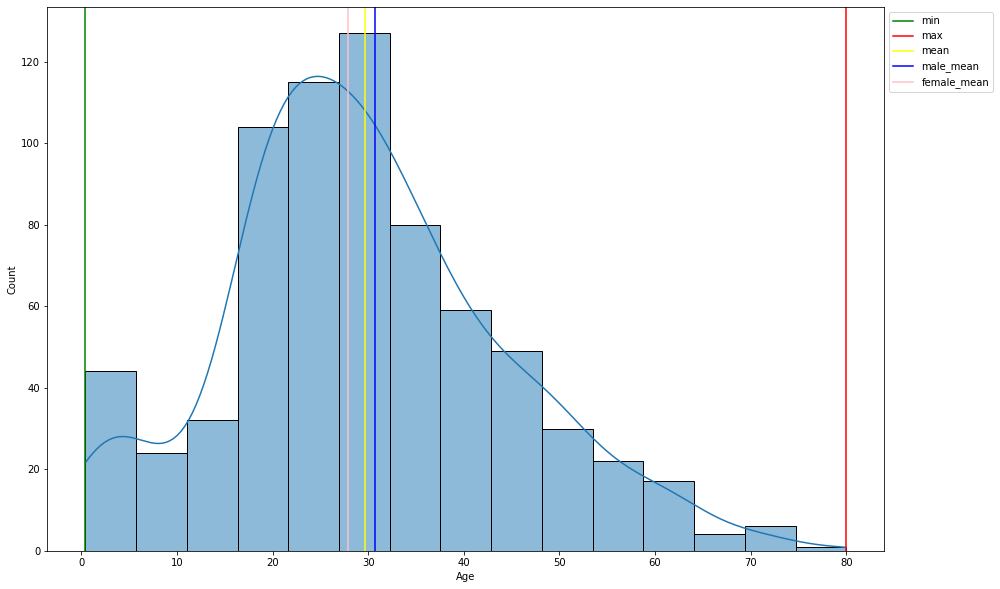

In [29]:
plt.figure(figsize=(15, 10))
p = sns.histplot(dataset['Age'], kde=True, legend=True, bins=15)
p.axvline(dataset['Age'].min(), color='green', label='min')
p.axvline(dataset['Age'].max(), color='red', label='max')
p.axvline(dataset['Age'].mean(), color='yellow', label='mean')
p.axvline(dataset[dataset['Sex'] == 'male']['Age'].mean(), color='blue', label='male_mean')
p.axvline(dataset[dataset['Sex'] == 'female']['Age'].mean(), color='pink', label='female_mean')
p.legend(bbox_to_anchor= (1,1))
plt.show()

В среднем женщины на борту моложе мужчин, но, скорее всего, это в рамках погрешности(наблюдений всего 891).

Минимальный возраст: 0, Максимальный возраст: 80

Больше всего людей на борту в возрасте примерно от 27 до 32 лет.

Распределение ненормально, со сдвигом влево

**Task 3** (1 points) <br/>
Find all the titles of the passengers (example, *Capt., Mr.,Mme.*), which are written in the column Name, and answer the following questions:

    * How many are there unique titles?
    * How many are there passengers with every title?
    * What is the most popular man's title? And woman's title?
    
**Hint** You may select the title from the name as a word which contains a dot.

## Add Title column to dataset

In [30]:
def get_title(row):
    words = row['Name'].split(' ')
    for word in words:
        if word[-1] == '.':
            return word
    return None

dataset['Title'] = dataset.apply(get_title, axis=1)
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr.


## Unique titles

In [31]:
print("Уникальные значения:", dataset['Title'].unique())
print("Количество:", dataset['Title'].unique().size)

Уникальные значения: ['Mr.' 'Mrs.' 'Miss.' 'Master.' 'Don.' 'Rev.' 'Dr.' 'Mme.' 'Ms.' 'Major.'
 'Lady.' 'Sir.' 'Mlle.' 'Col.' 'Capt.' 'Countess.' 'Jonkheer.']
Количество: 17


## How many are there passengers with every title

In [32]:
dataset['Title'].value_counts()

Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Mlle.          2
Major.         2
Col.           2
Countess.      1
Capt.          1
Ms.            1
Sir.           1
Lady.          1
Mme.           1
Don.           1
Jonkheer.      1
Name: Title, dtype: int64

## What is the most popular man's title

In [33]:
dataset[dataset['Sex'] == 'male']['Title'].value_counts().keys()[0]

'Mr.'

## What is the most popular woman's title

In [34]:
dataset[dataset['Sex'] == 'female']['Title'].value_counts().keys()[0]

'Miss.'

**Task 4** (0.5 points) <br/>
Is there correlation between *pclass* and *ticket price*? Calculate mean price (for each port) -> for each pclass and visualize prize distribution for each port. Make conclusions about what you see on the plot

Hint: you could make one or several plot types i.e.  box, violine, pair, histogram (see additional notebooks for Seminar 1 "Visualization with Seaborn"). main point here is to **choose** plots wisely and **make meaningful conclusions**



In [35]:
print("Correlation matrix:")
dataset[['Pclass', 'Fare']].corr()

Correlation matrix:


,Pclass,Fare
Pclass,1.0000,-0.5495
Fare,-0.5495,1.0000


Корреляция отрицательная, по модулю ~0.55. Значит, что, возможно, есть небольшая линейная отрицательная зависимость между классом пассажира и ценой билета. Т.е. чем меньше номер класса - тем больше цена билета. Далее можно увидеть графическое подтверждение.

<Figure size 1080x720 with 0 Axes>

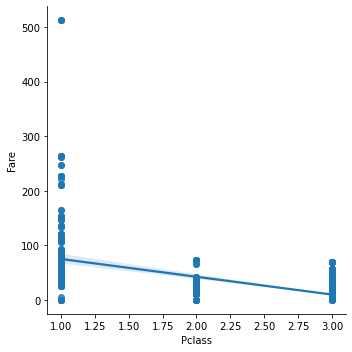

In [36]:
plt.figure(figsize=(15, 10))
sns.lmplot(data=dataset, x='Pclass', y='Fare')

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

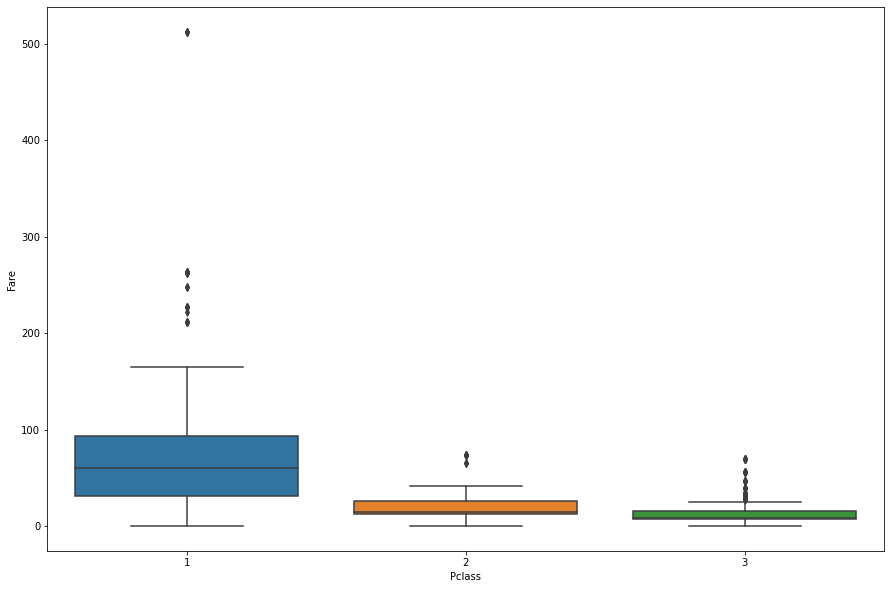

In [37]:
plt.figure(figsize=(15, 10))
sns.boxplot(x="Pclass", y="Fare", data=dataset)

Теперь построим графики распределения отдельно для каждого класса пассажира

In [38]:
first_mean = dataset[dataset['Pclass'] == 1]['Fare'].mean()
second_mean = dataset[dataset['Pclass'] == 2]['Fare'].mean()
third_mean = dataset[dataset['Pclass'] == 3]['Fare'].mean()
print("first_mean", first_mean)
print("second_mean", second_mean)
print("third_mean", third_mean)

first_mean 84.15468749999992
second_mean 20.66218315217391
third_mean 13.675550101832997


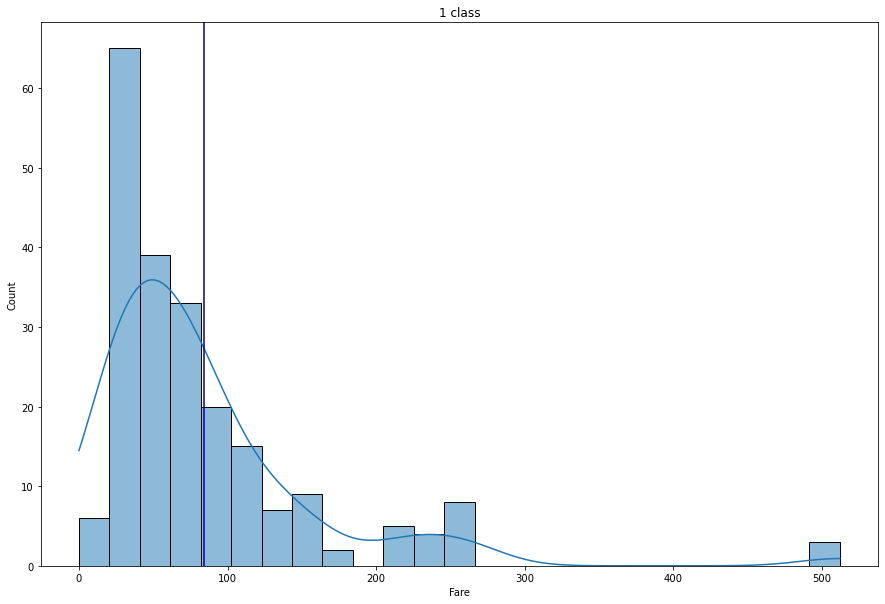

In [39]:
plt.figure(figsize=(15, 10))
p = sns.histplot(x=dataset[dataset['Pclass'] == 1]['Fare'], kde=True)
p.axvline(first_mean, label='first_mean', color='darkblue')
p.set(title='1 class')
plt.show()

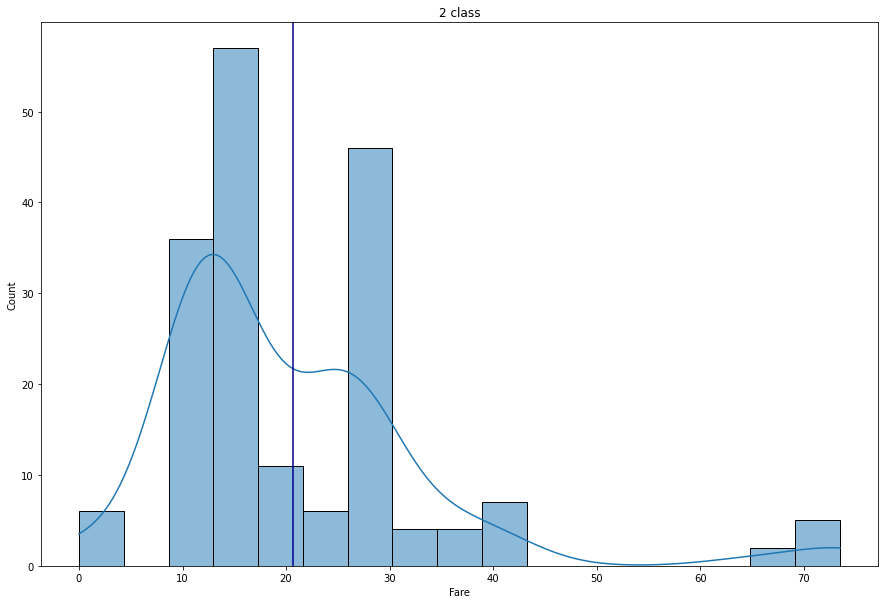

In [40]:
plt.figure(figsize=(15, 10))
p = sns.histplot(x=dataset[dataset['Pclass'] == 2]['Fare'], kde=True)
p.axvline(second_mean, label='second_mean', color='darkblue')
p.set(title='2 class')
plt.show()

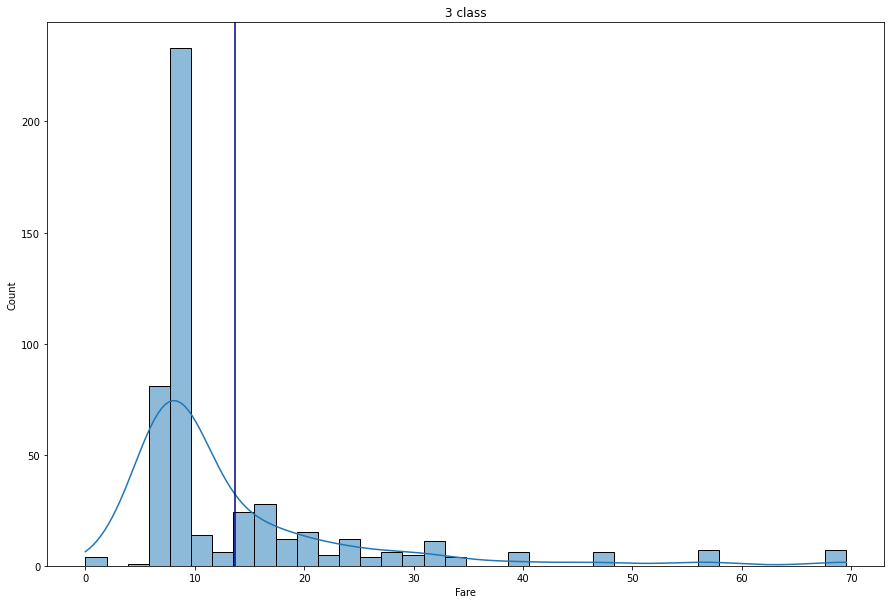

In [41]:
plt.figure(figsize=(15, 10))
p = sns.histplot(x=dataset[dataset['Pclass'] == 3]['Fare'], kde=True)
p.axvline(third_mean, label='third_mean', color='darkblue')
p.set(title='3 class')
plt.show()

Видно, что класс 1 выбивается из других - у него самая большая цена на билет. У 2 класса намного меньше, а у 3 чуть меньше, чем у 2. Это соответсвует логике - у пассажиров 1 класса больше удобств и соответственно цены на билеты выше.

Значит, есть отрицательная линейная зависимость

**Task 5** (0.5 points) <br/>
The same question as in task 4 about correlation between *embarked* and *ticket priсe*.

Поскольку это категориальная переменная, давайте для начала построим отдельные графики для каждого порта.

## For each port

In [42]:
S_mean = dataset[dataset['Embarked'] == 'S']['Fare'].mean()
C_mean = dataset[dataset['Embarked'] == 'C']['Fare'].mean()
Q_mean = dataset[dataset['Embarked'] == 'Q']['Fare'].mean()
print("S_mean", S_mean)
print("C_mean", C_mean)
print("Q_mean", Q_mean)

S_mean 27.07981180124218
C_mean 59.95414404761905
Q_mean 13.276029870129872


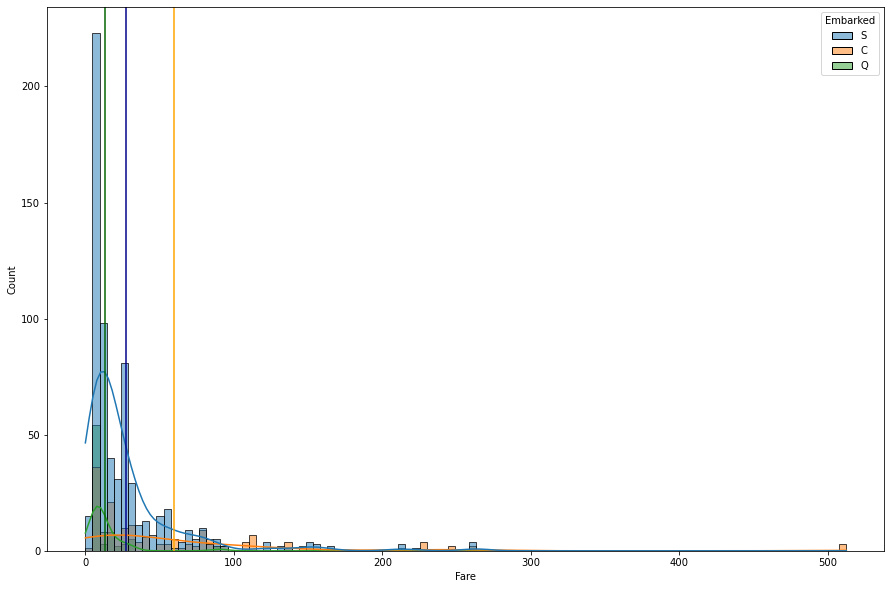

In [43]:
plt.figure(figsize=(15, 10))
p = sns.histplot(x=dataset['Fare'], hue=dataset['Embarked'], kde=True)
p.axvline(S_mean, label='S_mean', color='darkblue')
p.axvline(C_mean, label='C_mean', color='orange')
p.axvline(Q_mean, label='Q_mean', color='darkgreen')
plt.show()

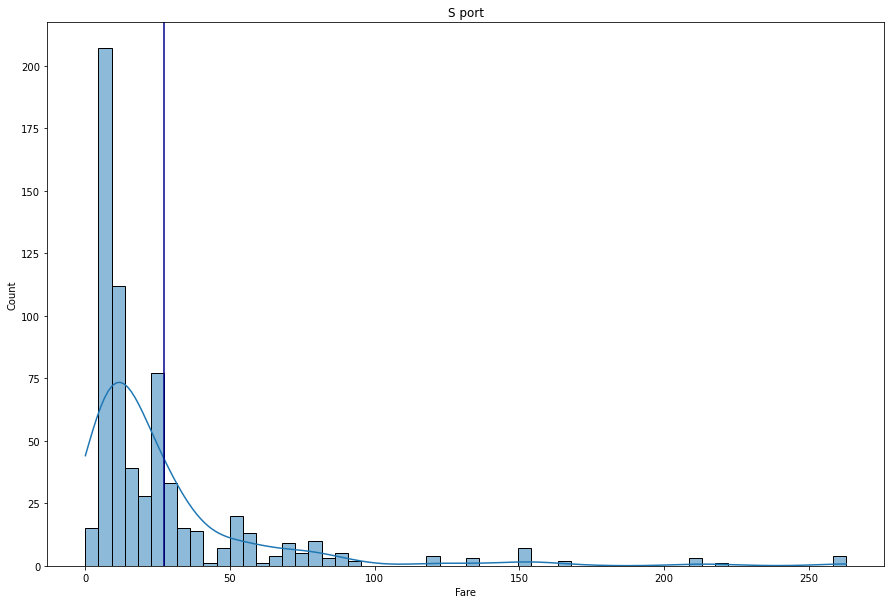

In [44]:
plt.figure(figsize=(15, 10))
p = sns.histplot(x=dataset[dataset['Embarked'] == 'S']['Fare'], kde=True)
p.axvline(S_mean, label='S_mean', color='darkblue')
p.set(title='S port')
plt.show()

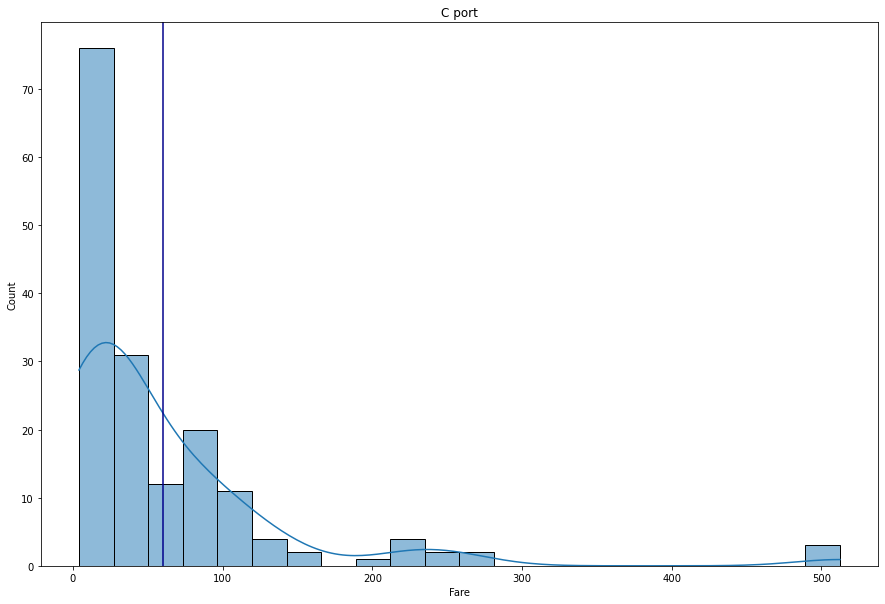

In [45]:
plt.figure(figsize=(15, 10))
p = sns.histplot(x=dataset[dataset['Embarked'] == 'C']['Fare'], kde=True)
p.axvline(C_mean, label='C_mean', color='darkblue')
p.set(title='C port')
plt.show()

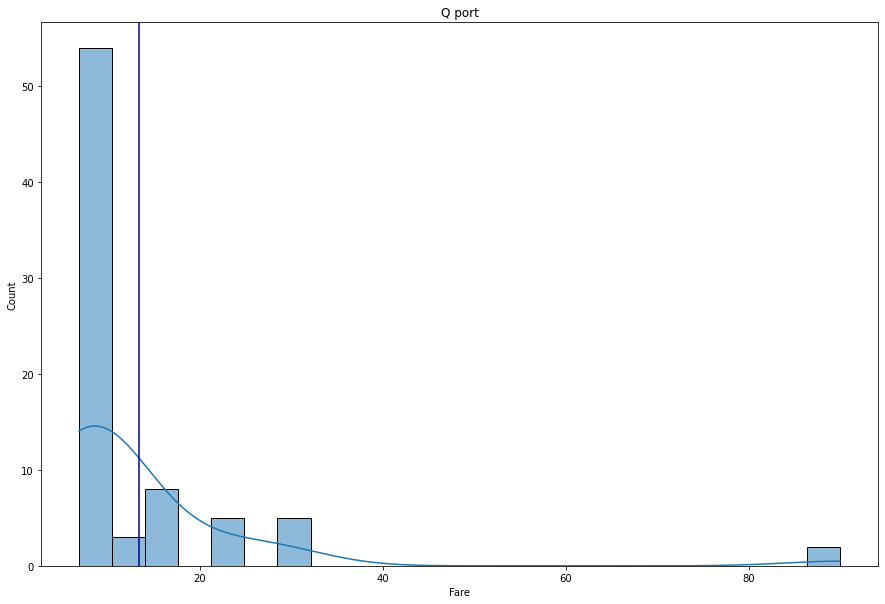

In [46]:
plt.figure(figsize=(15, 10))
p = sns.histplot(x=dataset[dataset['Embarked'] == 'Q']['Fare'], kde=True)
p.axvline(Q_mean, label='Q_mean', color='darkblue')
p.set(title='Q port')
plt.show()

## Conclusions
В среднем самые дорогие билеты оказались из порта C, а самые дешевые - из Q. Но, скорее всего, такое большое среднее в порте Q оказалось таковым, потому что по ним у нас маленькая выборка, а также есть выбросы в очень большим значением цены.

Ранее мы уже считали количество данных по разным портам

In [47]:
dataset['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Меньше всего данных у нас по порту Q, далее - по порту C, и больше всего - по порту S. Так что, скорее всего, разные средние продиктованы выбросами в данных и несбалансированной выборкой. Давайте проверим на выбросы

<AxesSubplot:xlabel='Embarked', ylabel='Fare'>

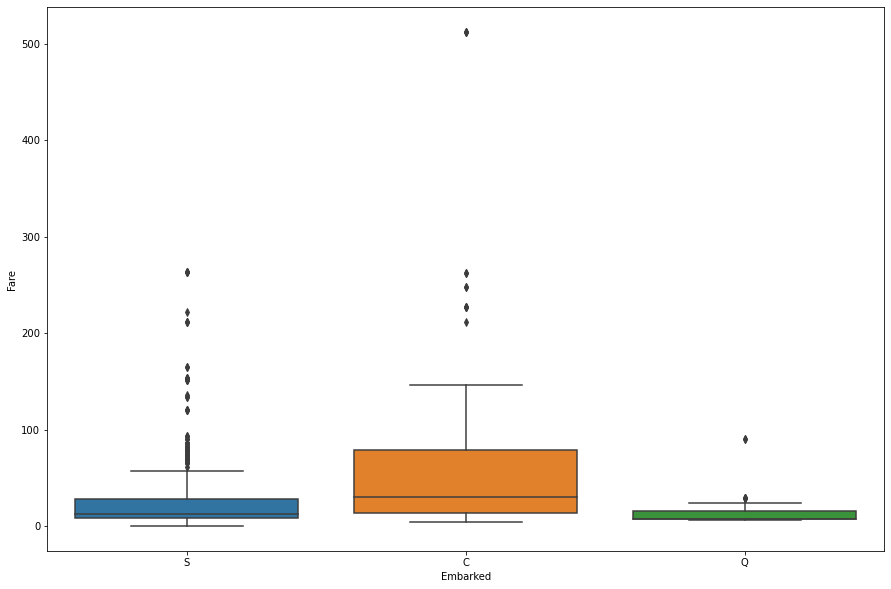

In [48]:
plt.figure(figsize=(15, 10))
sns.boxplot(x="Embarked", y="Fare", data=dataset)

Действительно, у С есть много выбросов, относительно количества данных. И, т.к. мы не можем однозначно определить(из логики), действительно ли порты отличаются по стоимости(в отличие от класса пассажира), скорее всего, между именем порта и ценой билета нет корреляции из-за выбросов. 

Давайте теперь переименуем переменные в числа и построим матрицу корреляции

In [49]:
dataset['Embarked'] = dataset[['Embarked']].apply(lambda col:pd.Categorical(col).codes)
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,2,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,0,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,2,Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,2,Mr.


In [50]:
print("Correlation matrix:")
dataset[['Embarked', 'Fare']].corr()

Correlation matrix:


,Embarked,Fare
Embarked,1.000000,-0.230365
Fare,-0.230365,1.000000


 Тут уже корреляция по модулю не очень велика. В прошлых пунктах объяснялось, почему, скорее всего, между ними нет зависимости.

**Task 6** (0.5 points) <br/>
Visualize age distribution for survived and not survived passengers separately and calculate the mean age for each class. Are they different? Provide the same visualization for males and females separately. Make conclusions about what you see on the plots

In [51]:
print("Survived age mean:", dataset[dataset['Survived'] == 0]['Age'].mean())
print("Not survived age mean:", dataset[dataset['Survived'] == 1]['Age'].mean())

Survived age mean: 30.62617924528302
Not survived age mean: 28.343689655172415


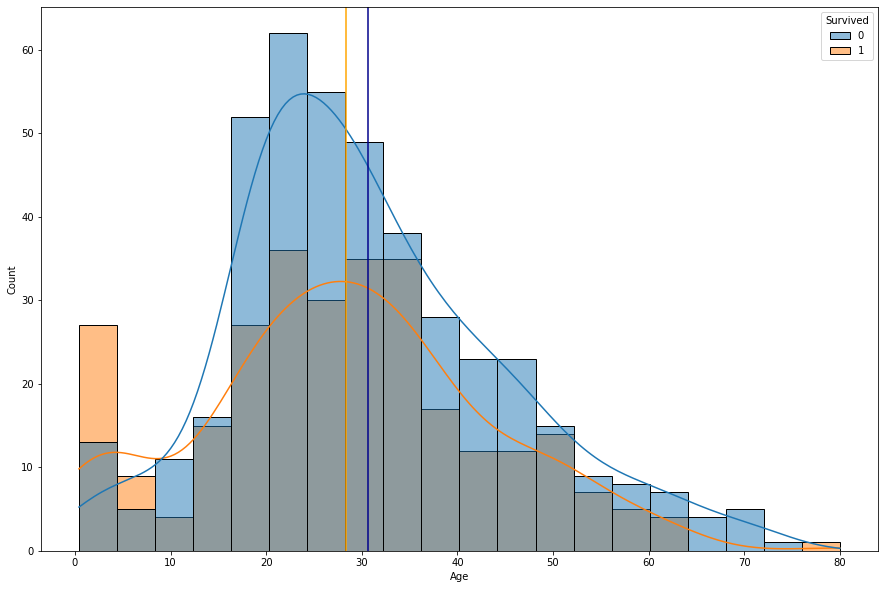

In [52]:
plt.figure(figsize=(15, 10))
p = sns.histplot(x=dataset['Age'], hue=dataset['Survived'], kde=True)
p.axvline(dataset[dataset['Survived'] == 0]['Age'].mean(), label='not survived mean', color='darkblue')
p.axvline(dataset[dataset['Survived'] == 1]['Age'].mean(), label='survived mean', color='orange')
plt.show()

Выходит, что все-таки более молодые люди выживают чаще. Средний возраст немного отличается, хотя это может быть тоже из-за несбалансированной выборки, о которой также говорилось в прошлых пунктах. Хотя из логики понятно, что людям молодого возраста легче спастись в связи с уровнем здоровья.

Также видно, что часто выживают дети. Скорее всего, их спасали более взрослые люди из гуманистических соображений.

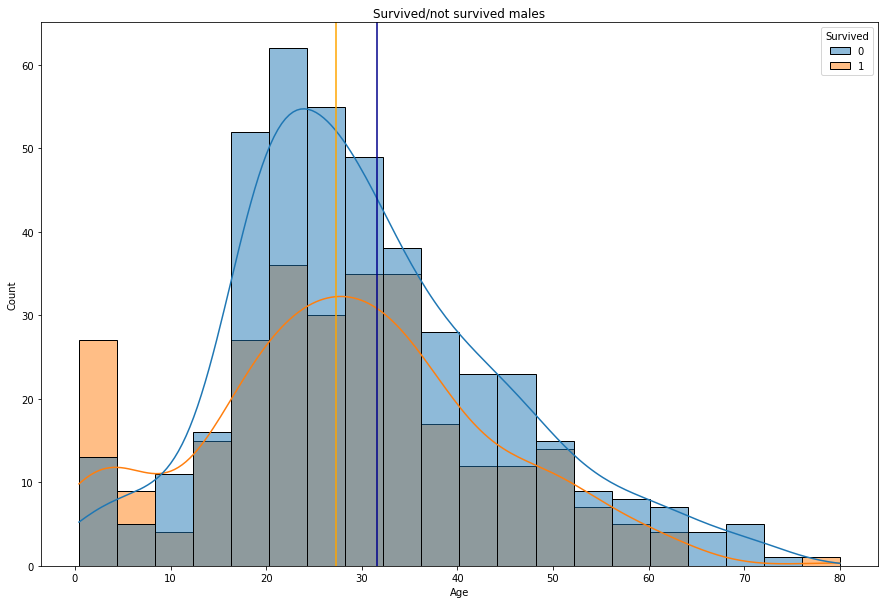

In [53]:
plt.figure(figsize=(15, 10))
p = sns.histplot(x=dataset['Age'], hue=dataset['Survived'], kde=True)
p.axvline(dataset[(dataset['Sex'] == 'male') & (dataset['Survived'] == 0)]['Age'].mean(), label='survived mean', color='darkblue')
p.axvline(dataset[(dataset['Sex'] == 'male') & (dataset['Survived'] == 1)]['Age'].mean(), label='not survived mean', color='orange')
p.set(title='Survived/not survived males')
plt.show()

Судя по графику, более молодые мужчины чаще выживают

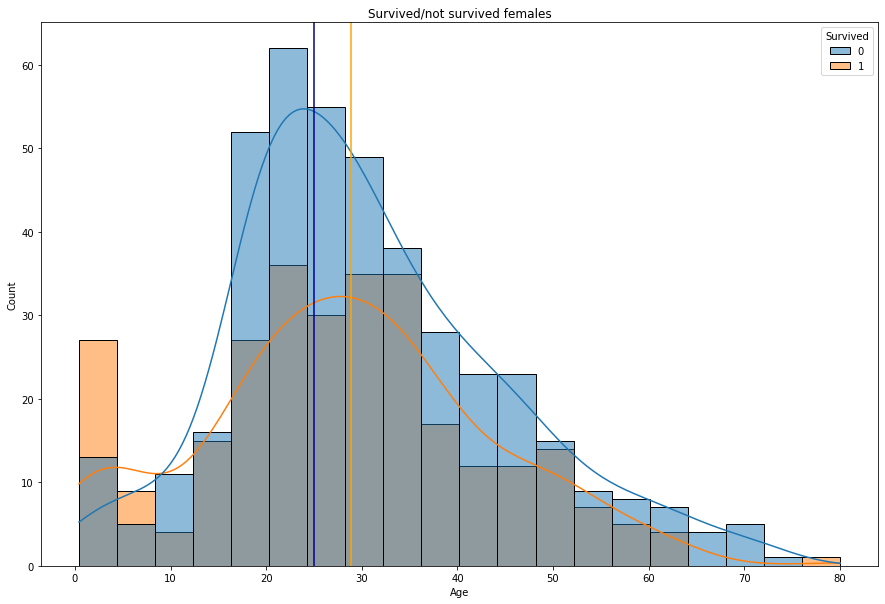

In [54]:
plt.figure(figsize=(15, 10))
p = sns.histplot(x=dataset['Age'], hue=dataset['Survived'], kde=True)
p.axvline(dataset[(dataset['Sex'] == 'female') & (dataset['Survived'] == 0)]['Age'].mean(), label='survived mean', color='darkblue')
p.axvline(dataset[(dataset['Sex'] == 'female') & (dataset['Survived'] == 1)]['Age'].mean(), label='not survived mean', color='orange')
p.set(title='Survived/not survived females')
plt.show()

Судя по графику, более взрослые женщины чаще выживают. Возможно, из-за того, что с ними на борту были маленькие дети и их спасали вместе с ними.

Поскольку тут выборки тоже несбалансированные и средний возраст не сильно отличается, то тоже можно сказать, что непонятно, действительно ли есть разница или дело в погрешности при недостатке данных.